### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бурдина Ксения Павловна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №13

Задание для лабораторной работы:

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Вариант 13:
- Horse Colic Data Set
- Первый признак: rectal temperature (столбец No 4)
- Второй признак: total protein (столбец No 20)
- Класс: outcome (столбец No 23)
- Алгоритмы: K-means, BIRCH, OPTICS, Spectral Clustering
- Меры качества: чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса
- Найти лучший алгоритм кластеризации относительно меры качества: чистота (purity)

Решение:

1. Считаем из заданного набора данных репозитария UCI значения двух признаков и метки класса.

Выведем заданный набор данных класса Horse Colic Data Set:

In [2]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data"
my_data = pd.read_csv( url, sep='\s+', header=None )
my_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


Считаем из набора значения признаков и метки класса:

In [3]:
df = my_data[[3, 19, 22]]
df

,3,19,22
0,38.50,8.40,2
1,39.2,85,3
2,38.30,6.70,1
3,39.10,7.20,2
4,37.30,7.40,2
...,...,...,...
295,?,65,3
296,37.20,?,3
297,37.50,6.80,2
298,36.50,6.00,1


2. Проверим, есть ли среди меток класса и признаков пропущенные значения.

Среди меток класса нет пропущенных значений, а среди признаков таковые имеются. Преобразуем пустые значения в виде вопросов в NaN, затем заменяем их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

Также преобразуем значения данных столбцов в численные:

In [4]:
import numpy as np
data = df.replace('?', np.NaN)
data = data.fillna(data.median())
data[22] = data[22].astype(int)
data[[3, 19]] = data[[3, 19]].astype(float)
data

,3,19,22
0,38.5,8.4,2
1,39.2,85.0,3
2,38.3,6.7,1
3,39.1,7.2,2
4,37.3,7.4,2
...,...,...,...
295,38.2,65.0,3
296,37.2,7.5,3
297,37.5,6.8,2
298,36.5,6.0,1


In [5]:
data.isnull().sum(axis=0) #проверим, что в данных столбцах отсутствуют пустые значения

3     0
19    0
22    0
dtype: int64

3. Проверим количество различных меток класса:

In [6]:
data.groupby(22).count()

,3,19
22,,
1,179,179
2,77,77
3,44,44


Видим, что у нас три различных метки, поэтому нет необходимости объединять классы.

4. Визуализируем набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишем оси и рисунок, создадим легенду набора данных:

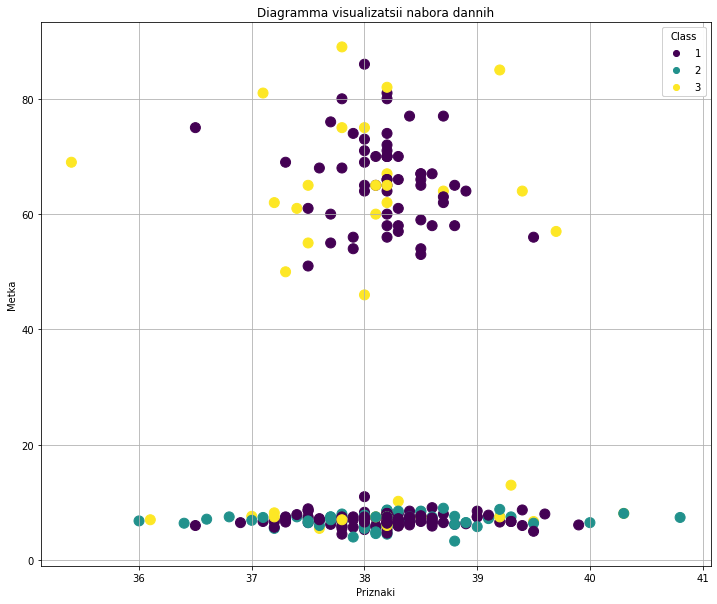

In [7]:
import matplotlib.pyplot as plt

X = data[[3, 19]].to_numpy()
y = data[22].to_numpy()

def plot_cluster(X,y):
    # визуализация кластеров 
    fig, ax = plt.subplots(figsize=(12,10))
    
    ax.grid(True)
    
    scatter = ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis', s=100); 
    
    ax.set_xlabel("Priznaki")
    ax.set_ylabel("Metka") 
    ax.set_title("Diagramma visualizatsii nabora dannih") 

    legend1 = ax.legend(*scatter.legend_elements(), title="Class") 
    ax.add_artist(legend1)
    
plot_cluster(X,y)

5. Проведем кластеризацию набора данных из двух признаков с помощью алгоритмов K-means, BIRCH, OPTICS, Spectral Clustering для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). Запомним предсказанные метки класса для каждой модели.

Алгоритм K-means:

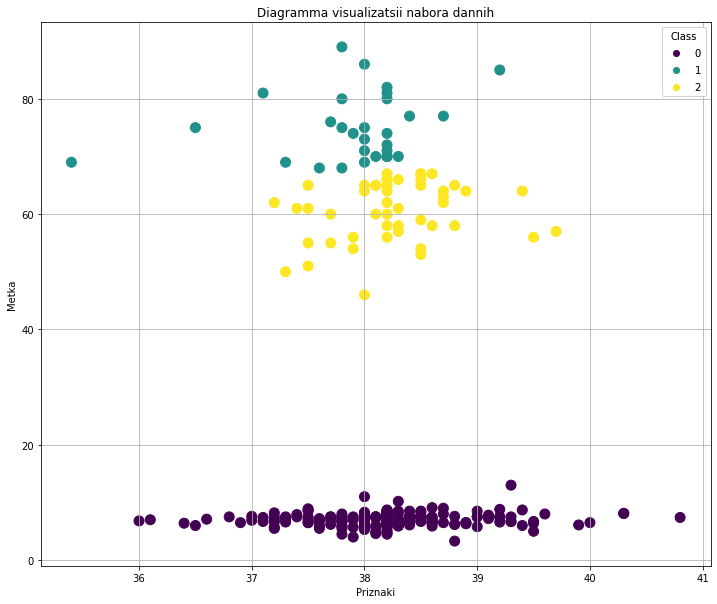

In [9]:
# кластеризация k-means 
from sklearn.cluster import KMeans
# модель
model1 = KMeans(n_clusters=3)
# тренируем модель
model1.fit(X)
# присваиваем метку каждой точке набора
yhat1 = model1.predict(X)
plot_cluster(X,yhat1)

label1 = model1.labels_

Алгоритм BIRCH:

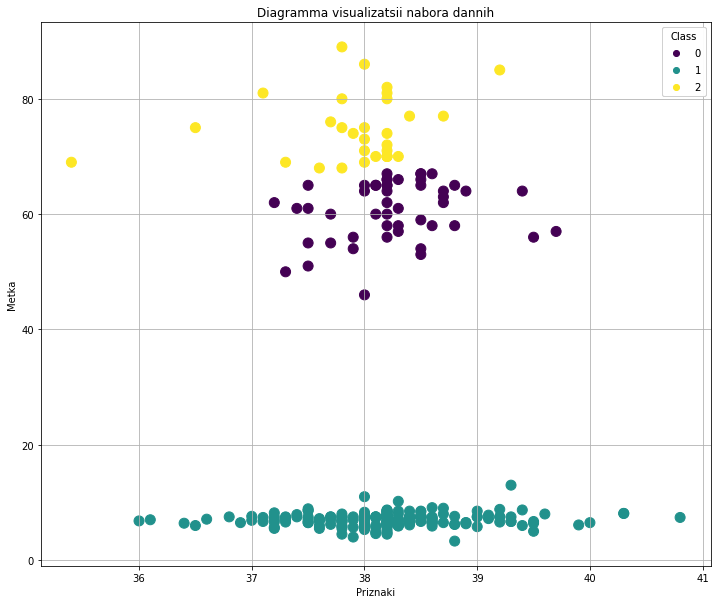

In [10]:
# кластеризация birch 
from sklearn.cluster import Birch
# модель
model2 = Birch(threshold=0.01, n_clusters=3)
# тренируем модель
model2.fit(X)
# присваиваем метку каждой точке набора
yhat = model2.predict(X)
plot_cluster(X,yhat)

label2 = model2.labels_

Алгоритм OPTICS:

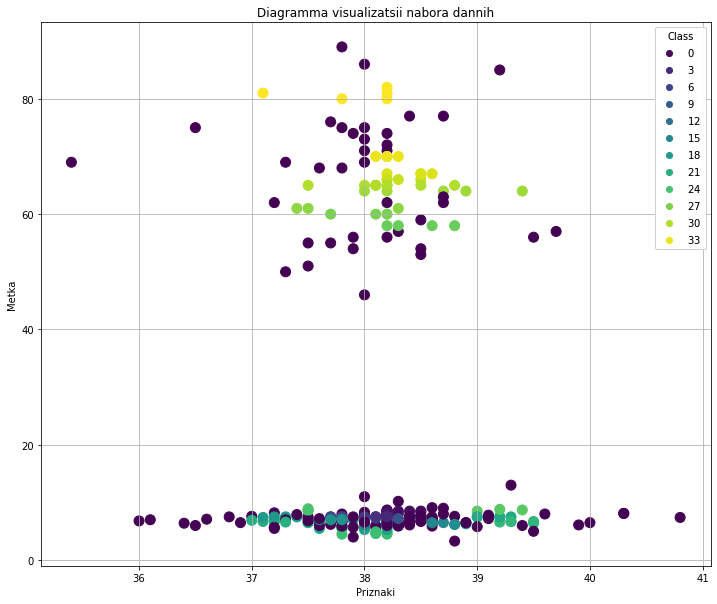

In [11]:
# кластеризация optics 
from sklearn.cluster import OPTICS
# модель
model3 = OPTICS(eps=0.20, min_samples=3)
# тренируем модель и присваиваем метку каждой точке набора
yhat3 = model3.fit_predict(X)
plot_cluster(X,yhat3)

label3 = model3.labels_

Алгоритм Spectral Clustering:

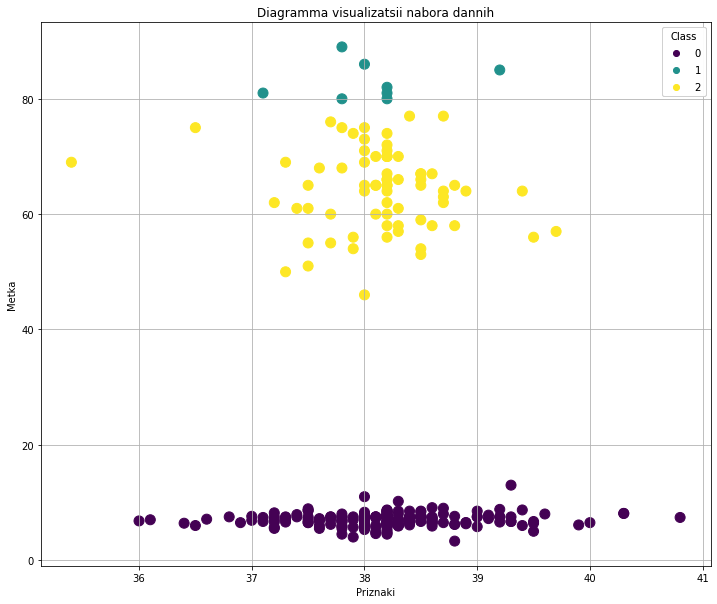

In [12]:
# спектральная кластеризация 
from sklearn.cluster import SpectralClustering
# модель
model4 = SpectralClustering(n_clusters=3)
# тренируем модель и присваиваем метку каждой точке набора
yhat = model4.fit_predict(X)
plot_cluster(X,yhat)

label4 = model4.labels_

6. Для каждого из алгоритмов кластеризации построим матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдем значения мер качества кластеризации, таких как чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса:

In [13]:
from sklearn.metrics import confusion_matrix

def counts_from_confusion(x, y): 
    """ 
    Obtain TP, FN FP, and TN for each class in the confusion matrix 
    """ 
    confusion =  confusion_matrix(x, y)
    
    counts_list = [] 
 
    # Iterate through classes and store the counts 
    for i in range(confusion.shape[0]): 
        tp = confusion[i, i] 
 
        fn_mask = np.zeros(confusion.shape) 
        fn_mask[i, :] = 1 
        fn_mask[i, i] = 0 
        fn = np.sum(np.multiply(confusion, fn_mask)) 
 
        fp_mask = np.zeros(confusion.shape) 
        fp_mask[:, i] = 1 
        fp_mask[i, i] = 0 
        fp = np.sum(np.multiply(confusion, fp_mask)) 
 
        tn_mask = 1 - (fn_mask + fp_mask) 
        tn_mask[i, i] = 0 
        tn = np.sum(np.multiply(confusion, tn_mask)) 
 
        counts_list.append({'Class': i, 
                            'TP': tp, 
                            'FN': fn, 
                            'FP': fp, 
                            'TN': tn}) 
 
    return counts_list

In [14]:
from sklearn.metrics.cluster import contingency_matrix
m1 = contingency_matrix(y, label1) # алгоритм K-means
m1

array([[121,  23,  35],
       [ 77,   0,   0],
       [ 23,   7,  14]], dtype=int64)

In [15]:
from sklearn.metrics import fowlkes_mallows_score

print("Чистота: ", np.sum(np.amax(m1, axis=0)) / np.sum(m1)) #purity

print("Индекс Фоулкса – Мэллоуса: ", fowlkes_mallows_score(y, label1))

counts_from_confusion(y, label1)

Чистота:  0.5966666666666667
Индекс Фоулкса – Мэллоуса:  0.5031244047447044


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 221.0, 'TN': 79.0},
 {'Class': 1, 'TP': 23, 'FN': 156.0, 'FP': 7.0, 'TN': 114.0},
 {'Class': 2, 'TP': 0, 'FN': 77.0, 'FP': 49.0, 'TN': 174.0},
 {'Class': 3, 'TP': 0, 'FN': 44.0, 'FP': 0.0, 'TN': 256.0}]

In [16]:
m2 = contingency_matrix(y, label2) # алгоритм  BIRCH
m2

array([[ 35, 121,  23],
       [  0,  77,   0],
       [ 14,  23,   7]], dtype=int64)

In [17]:
from sklearn.metrics import fowlkes_mallows_score

print("Чистота: ", np.sum(np.amax(m2, axis=0)) / np.sum(m2)) #purity

print("Индекс Фоулкса – Мэллоуса: ", fowlkes_mallows_score(y, label2))

counts_from_confusion(y, label2)

Чистота:  0.5966666666666667
Индекс Фоулкса – Мэллоуса:  0.5031244047447044


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 49.0, 'TN': 251.0},
 {'Class': 1, 'TP': 121, 'FN': 58.0, 'FP': 100.0, 'TN': 21.0},
 {'Class': 2, 'TP': 0, 'FN': 77.0, 'FP': 30.0, 'TN': 193.0},
 {'Class': 3, 'TP': 0, 'FN': 44.0, 'FP': 0.0, 'TN': 256.0}]

In [18]:
m3 = contingency_matrix(y, label3) # алгоритм OPTICS
m3

array([[76,  3,  4,  1,  5,  0,  3,  2,  2,  7,  3,  3,  1,  2,  0,  2,
         5,  2,  6,  1,  3,  2,  5,  3,  2,  3,  2,  4,  2,  2,  3,  5,
         4,  3,  5,  3],
       [28,  6,  0,  3,  8,  2,  0,  3,  1,  0,  0,  0,  3,  1,  4,  2,
         0,  1,  1,  3,  1,  2,  2,  1,  4,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [20,  1,  0,  0,  3,  1,  0,  0,  3,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  2,  3,
         0,  1,  0,  2]], dtype=int64)

In [19]:
from sklearn.metrics import fowlkes_mallows_score

print("Чистота: ", np.sum(np.amax(m3, axis=0)) / np.sum(m3)) #purity

print("Индекс Фоулкса – Мэллоуса: ", fowlkes_mallows_score(y, label3))

counts_from_confusion(y, label3)

Чистота:  0.67
Индекс Фоулкса – Мэллоуса:  0.2878979773769253


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 124.0, 'TN': 176.0},
 {'Class': 1, 'TP': 0, 'FN': 0.0, 'FP': 10.0, 'TN': 290.0},
 {'Class': 2, 'TP': 4, 'FN': 175.0, 'FP': 0.0, 'TN': 121.0},
 {'Class': 3, 'TP': 3, 'FN': 74.0, 'FP': 1.0, 'TN': 222.0},
 {'Class': 4, 'TP': 3, 'FN': 41.0, 'FP': 13.0, 'TN': 243.0},
 {'Class': 5, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 297.0},
 {'Class': 6, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 297.0},
 {'Class': 7, 'TP': 0, 'FN': 0.0, 'FP': 5.0, 'TN': 295.0},
 {'Class': 8, 'TP': 0, 'FN': 0.0, 'FP': 6.0, 'TN': 294.0},
 {'Class': 9, 'TP': 0, 'FN': 0.0, 'FP': 7.0, 'TN': 293.0},
 {'Class': 10, 'TP': 0, 'FN': 0.0, 'FP': 4.0, 'TN': 296.0},
 {'Class': 11, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 297.0},
 {'Class': 12, 'TP': 0, 'FN': 0.0, 'FP': 4.0, 'TN': 296.0},
 {'Class': 13, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 297.0},
 {'Class': 14, 'TP': 0, 'FN': 0.0, 'FP': 4.0, 'TN': 296.0},
 {'Class': 15, 'TP': 0, 'FN': 0.0, 'FP': 4.0, 'TN': 296.0},
 {'Class': 16, 'TP': 0, 'FN': 0.0, 'FP': 5

In [20]:
m4 = contingency_matrix(y, label4) # алгоритм Spectral Clustering
m4

array([[121,   4,  54],
       [ 77,   0,   0],
       [ 23,   4,  17]], dtype=int64)

In [21]:
from sklearn.metrics import fowlkes_mallows_score

print("Чистота: ", np.sum(np.amax(m4, axis=0)) / np.sum(m4)) #purity

print("Индекс Фоулкса – Мэллоуса: ", fowlkes_mallows_score(y, label4))

counts_from_confusion(y, label4)

Чистота:  0.5966666666666667
Индекс Фоулкса – Мэллоуса:  0.5214504314628399


[{'Class': 0, 'TP': 0, 'FN': 0.0, 'FP': 221.0, 'TN': 79.0},
 {'Class': 1, 'TP': 4, 'FN': 175.0, 'FP': 4.0, 'TN': 117.0},
 {'Class': 2, 'TP': 0, 'FN': 77.0, 'FP': 71.0, 'TN': 152.0},
 {'Class': 3, 'TP': 0, 'FN': 44.0, 'FP': 0.0, 'TN': 256.0}]

7. По данным, полученным в предыдущем пункте, алгоритм OPTICS является самым оптимальным с точки зрения меры качества чистоты.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируем области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишем оси и рисунок, создадим легенду набора данных.

P.s. Для данного алгоритма код очень долго компилируется (за 30 минут никаких результатов), в том числе не помогло уменьшение количества элементов массива с 300 до 50. Поэтому возьмем иной алгоритм. Так как чистота у остальных алгоритмов равна, то без разницы, с каким нам работать. Возьмем, к примеру, алгоритм K-means:

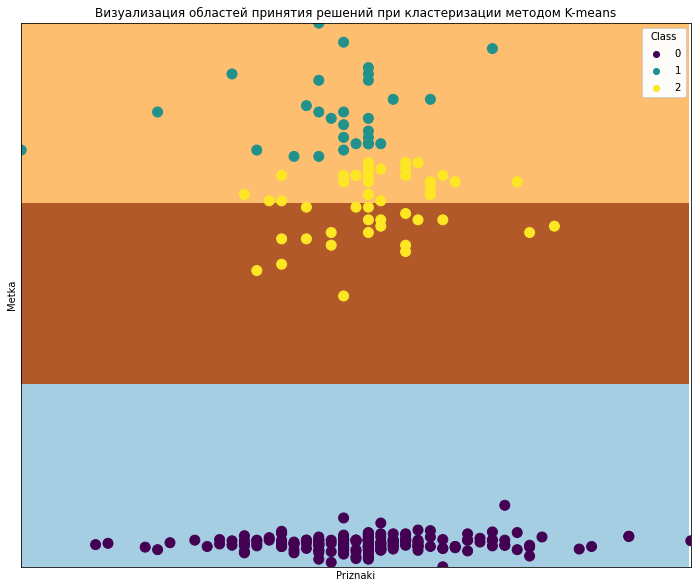

In [38]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model1.fit_predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(12,10))
    
ax.grid(True)
    
scatter = ax.scatter(X[:,0], X[:,1], c = yhat1, cmap = 'viridis', s=100); 
    
ax.set_xlabel("Priznaki")
ax.set_ylabel("Metka") 

legend1 = ax.legend(*scatter.legend_elements(), title="Class") 
ax.add_artist(legend1)

#plt.figure(1)
#plt.clf()
ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

ax.set_title("Визуализация областей принятия решений при кластеризации методом K-means")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(());